# Predicting antibody-antigen interactions with Transformer-based machine learning
### Part 5: Post-prediction analysis
- All predictions from the logistic regression model and esm model were combined into `predictions_combined.csv`
- We use confusion matrices to compare the true positive rate across the different classes for each experiment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [2]:
pred_comb = pd.read_csv("/kaggle/input/1024-dataset-featurized/predictions_combined.csv")
pred_comb.head()

,pred_label,true_label,model,dataset,seq_ver
0,0,0,ESM,IMBALANCED,FULL
1,0,0,ESM,IMBALANCED,FULL
2,0,0,ESM,IMBALANCED,FULL
3,1,1,ESM,IMBALANCED,FULL
4,0,0,ESM,IMBALANCED,FULL


In [3]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized Confusion Matrix'
        else:
            title = 'Confusion Matrix, Without Normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(classes)))
    ax.set_yticks(np.arange(len(classes)))
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [4]:
esm_imb_full = pred_comb.loc[(pred_comb["model"].str.contains("ESM") & 
                             pred_comb["dataset"].str.contains("IMBALANCED") & 
                             pred_comb["seq_ver"].str.contains("FULL"))]

esm_imb_cdr = pred_comb.loc[(pred_comb["model"].str.contains("ESM") & 
                             pred_comb["dataset"].str.contains("IMBALANCED") & 
                             pred_comb["seq_ver"].str.contains("CDR"))]

esm_bal_full = pred_comb.loc[(pred_comb["model"].str.contains("ESM") & 
                             pred_comb["dataset"].str.contains("BALANCED") & 
                             pred_comb["seq_ver"].str.contains("FULL"))]

esm_bal_cdr = pred_comb.loc[(pred_comb["model"].str.contains("ESM") & 
                             pred_comb["dataset"].str.contains("BALANCED") & 
                             pred_comb["seq_ver"].str.contains("CDR"))]
#--- For Logistic Reregssion
lr_imb_full = pred_comb.loc[(pred_comb["model"].str.contains("LR") & 
                             pred_comb["dataset"].str.contains("IMBALANCED") & 
                             pred_comb["seq_ver"].str.contains("FULL"))]

lr_imb_cdr = pred_comb.loc[(pred_comb["model"].str.contains("LR") & 
                             pred_comb["dataset"].str.contains("IMBALANCED") & 
                             pred_comb["seq_ver"].str.contains("CDR"))]

lr_bal_full = pred_comb.loc[(pred_comb["model"].str.contains("LR") & 
                             pred_comb["dataset"].str.contains("BALANCED") & 
                             pred_comb["seq_ver"].str.contains("FULL"))]

lr_bal_cdr = pred_comb.loc[(pred_comb["model"].str.contains("LR") & 
                             pred_comb["dataset"].str.contains("BALANCED") & 
                             pred_comb["seq_ver"].str.contains("CDR"))]

In [5]:
plt.clf()

<Figure size 640x480 with 0 Axes>

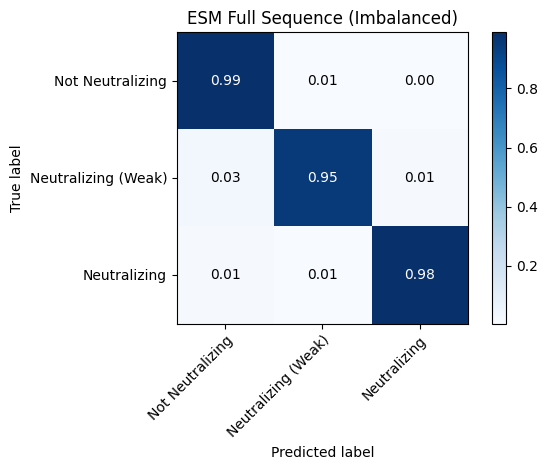

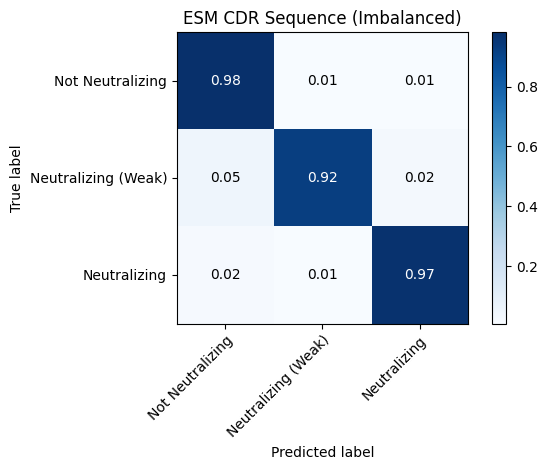

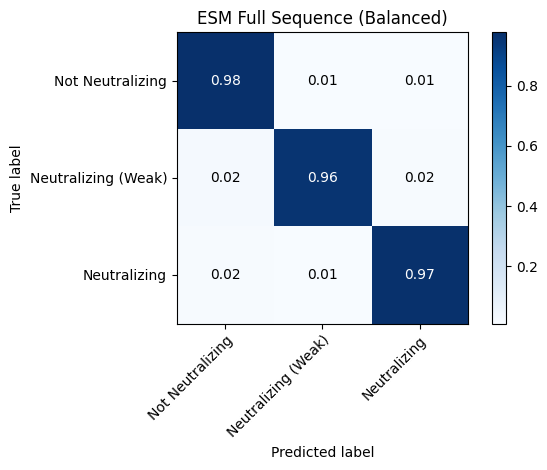

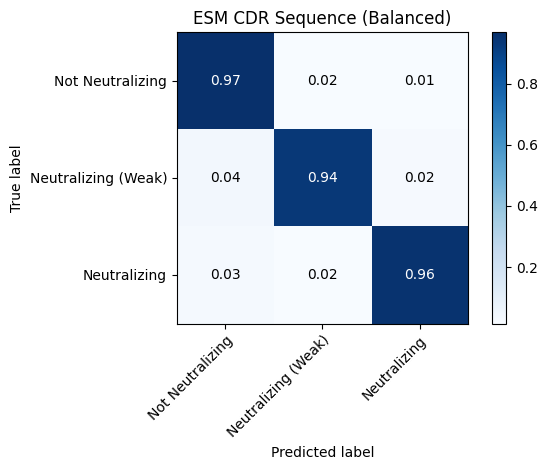

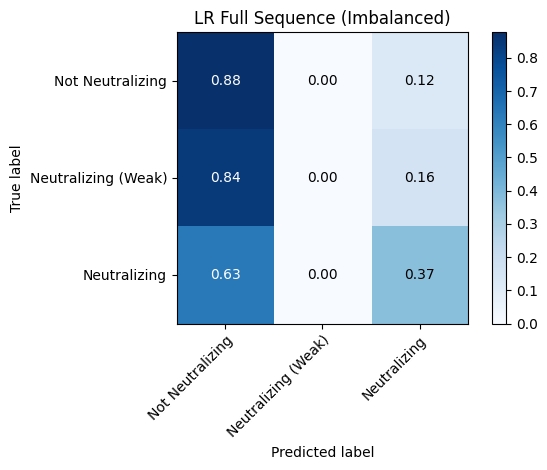

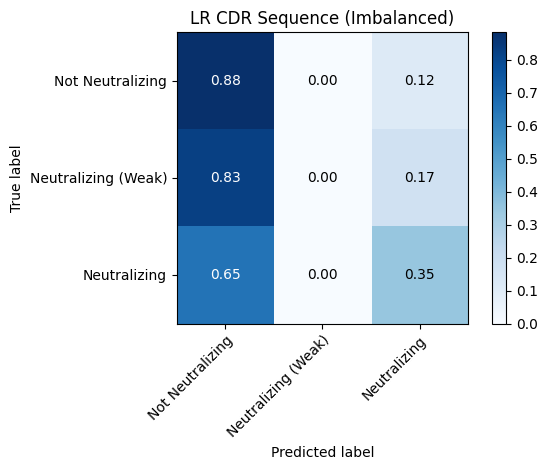

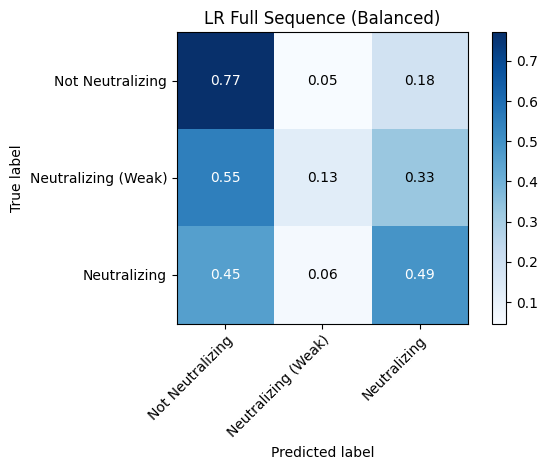

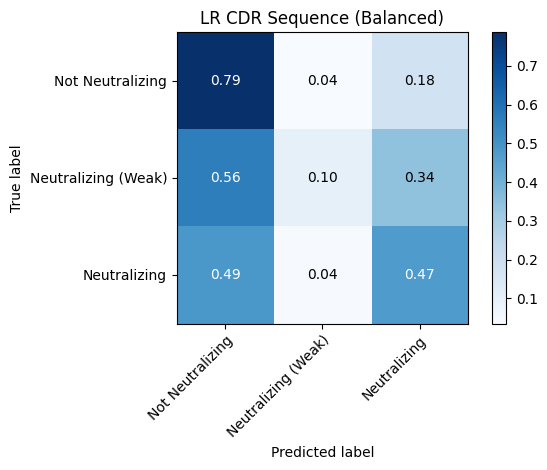

<Figure size 640x480 with 0 Axes>

In [6]:
# ESM Imbalanced Full Seq
class_names = ['Not Neutralizing', 'Neutralizing (Weak)', 'Neutralizing']
predicted_labels = esm_imb_full['pred_label'].values
true_labels = esm_imb_full['true_label'].values
plot_confusion_matrix(true_labels, predicted_labels, classes=class_names, normalize=True,
                      title='ESM Full Sequence (Imbalanced)')
# ESM Imbalanced CDR Seq
predicted_labels = esm_imb_cdr['pred_label'].values
true_labels = esm_imb_cdr['true_label'].values
plot_confusion_matrix(true_labels, predicted_labels, classes=class_names, normalize=True,
                      title='ESM CDR Sequence (Imbalanced)')
# ESM Balanced Full Seq
class_names = ['Not Neutralizing', 'Neutralizing (Weak)', 'Neutralizing']
predicted_labels = esm_bal_full['pred_label'].values
true_labels = esm_bal_full['true_label'].values
plot_confusion_matrix(true_labels, predicted_labels, classes=class_names, normalize=True,
                      title='ESM Full Sequence (Balanced)')
# ESM Balanced CDR Seq
predicted_labels = esm_bal_cdr['pred_label'].values
true_labels = esm_bal_cdr['true_label'].values
plot_confusion_matrix(true_labels, predicted_labels, classes=class_names, normalize=True,
                      title='ESM CDR Sequence (Balanced)')

# LR Imbalanced Full Seq
class_names = ['Not Neutralizing', 'Neutralizing (Weak)', 'Neutralizing']
predicted_labels = lr_imb_full['pred_label'].values
true_labels = lr_imb_full['true_label'].values
plot_confusion_matrix(true_labels, predicted_labels, classes=class_names, normalize=True,
                      title='LR Full Sequence (Imbalanced)')
# LR Imbalanced CDR Seq
predicted_labels = lr_imb_cdr['pred_label'].values
true_labels = lr_imb_cdr['true_label'].values
plot_confusion_matrix(true_labels, predicted_labels, classes=class_names, normalize=True,
                      title='LR CDR Sequence (Imbalanced)')
# LR Balanced Full Seq
class_names = ['Not Neutralizing', 'Neutralizing (Weak)', 'Neutralizing']
predicted_labels = lr_bal_full['pred_label'].values
true_labels = lr_bal_full['true_label'].values
plot_confusion_matrix(true_labels, predicted_labels, classes=class_names, normalize=True,
                      title='LR Full Sequence (Balanced)')
# LR Balanced CDR Seq
predicted_labels = lr_bal_cdr['pred_label'].values
true_labels = lr_bal_cdr['true_label'].values
plot_confusion_matrix(true_labels, predicted_labels, classes=class_names, normalize=True,
                      title='LR CDR Sequence (Balanced)')

plt.show()
plt.savefig('confusionmatrices.png')